In [65]:
## Importing Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

## Sklearn library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score,classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [66]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [67]:
df_train = pd.read_csv("train_s3TEQDk.csv")
df_train["source"]="train"
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,train


In [68]:
df_test = pd.read_csv("test_mSzZ8RL.csv")
df_test["source"]="test"
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,source
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,test
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,test
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,test
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,test
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,test


In [69]:
df=pd.concat([df_train,df_test],ignore_index=True)
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,train


In [70]:
##Inspect Dataframe

#database dimension
print("Database dimension     :",df.shape)
print("Database size          :",df.size)
print("Number of Row          :",len(df.index))
print("Number of Columns      :",len(df.columns))

Database dimension     : (351037, 12)
Database size          : 4212444
Number of Row          : 351037
Number of Columns      : 12


In [71]:
#checking numerical columns statistics
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,351037.000000,351037.000000,3.510370e+05,245725.000000
mean,43.860716,46.924244,1.130141e+06,0.237208
std,14.841932,32.329303,8.569530e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.041850e+05,0.000000
50%,43.000000,32.000000,8.951620e+05,0.000000
75%,54.000000,73.000000,1.368152e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [72]:
#info about the column types etc. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   351037 non-null  object 
 1   Gender               351037 non-null  object 
 2   Age                  351037 non-null  int64  
 3   Region_Code          351037 non-null  object 
 4   Occupation           351037 non-null  object 
 5   Channel_Code         351037 non-null  object 
 6   Vintage              351037 non-null  int64  
 7   Credit_Product       309190 non-null  object 
 8   Avg_Account_Balance  351037 non-null  int64  
 9   Is_Active            351037 non-null  object 
 10  Is_Lead              245725 non-null  float64
 11  source               351037 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 32.1+ MB


In [73]:
#Column wise Null Value calculate
#Column wise null values in train data set 
null_perc = pd.DataFrame(round((df.isnull().sum())*100/df.shape[0],2)).reset_index()
null_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(df.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_lead = pd.merge(null_value, null_perc, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)

,Column Name,Null Values,Null Values Percentage
10,Is_Lead,105312,30.00
7,Credit_Product,41847,11.92
0,ID,0,0.00
1,Gender,0,0.00
2,Age,0,0.00
3,Region_Code,0,0.00
4,Occupation,0,0.00
5,Channel_Code,0,0.00
6,Vintage,0,0.00
8,Avg_Account_Balance,0,0.00


In [74]:
#Fill null values in Credit_Product feature
df['Credit_Product']= df['Credit_Product'].fillna("NA")

In [75]:
#Again check for null values
df.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64

Observation: No null values are present except Is_Lead as it is our target variable

In [76]:
#Changing Yes to 1 and No to 0 in Is_Active column to covert  data into float

df["Is_Active"].replace(["Yes","No"],[1,0],inplace=True)

df['Is_Active'] = df['Is_Active'].astype(float)
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,0.0,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,0.0,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,1.0,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,0.0,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,0.0,0.0,train


In [77]:
categorical_col=df.select_dtypes(exclude=['number']).columns.values
numerical_col=df.select_dtypes(include=['number']).columns.values

In [78]:
def Cat_info(df,categorical_column):
    df_result=pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp['columns']=[value]
        df_temp['values']=[df[value].unique()]
        df_temp["unique_values"]=df[value].nunique()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result
####################
df_cat = Cat_info(df, categorical_col)
df_cat

,values,unique_values,null_values,null_percent
columns,,,,
ID,"[NNVBBKZB, IDD62UNG, HD3DSEMC, BF3NC7KV, TEASR...",351037,0,0.0
Gender,"[Female, Male]",2,0,0.0
Region_Code,"[RG268, RG277, RG270, RG282, RG261, RG265, RG2...",35,0,0.0
Occupation,"[Other, Salaried, Self_Employed, Entrepreneur]",4,0,0.0
Channel_Code,"[X3, X1, X2, X4]",4,0,0.0
Credit_Product,"[No, NA, Yes]",3,0,0.0
source,"[train, test]",2,0,0.0


In [79]:
#Now changing all categorical column into numerical form using label endcoding
cat_col=[ 'Gender', 'Region_Code', 'Occupation','Channel_Code', 'Credit_Product']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
  df[col]= le.fit_transform(df[col])


df_2= df
df_2.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,0,73,18,1,2,43,1,1045696,0.0,0.0,train
1,IDD62UNG,0,30,27,2,0,32,1,581988,0.0,0.0,train
2,HD3DSEMC,0,56,18,3,2,26,1,1484315,1.0,0.0,train
3,BF3NC7KV,1,34,20,2,0,19,1,470454,0.0,0.0,train
4,TEASRWXV,0,30,32,2,0,33,1,886787,0.0,0.0,train


In [80]:
#Separating the train and test
df_train=df_2.loc[df_2["source"]=="train"]
df_test=df_2.loc[df_2["source"]=="test"]
df_1 = df_train

In [81]:
#we can drop column as they are irrelevant and have no effect on our data
df_1.drop(columns=['ID',"source"],inplace=True)
df_1.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,1,1045696,0.0,0.0
1,0,30,27,2,0,32,1,581988,0.0,0.0
2,0,56,18,3,2,26,1,1484315,1.0,0.0
3,1,34,20,2,0,19,1,470454,0.0,0.0
4,0,30,32,2,0,33,1,886787,0.0,0.0


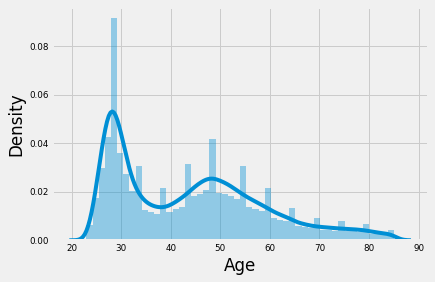

In [82]:
sns.distplot(df['Age']);

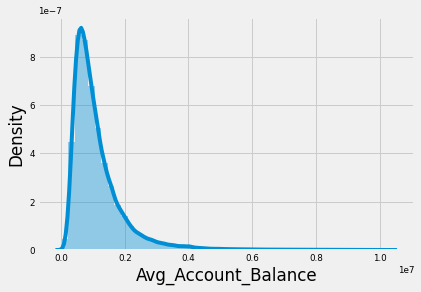

In [83]:
sns.distplot(df['Avg_Account_Balance'])
plt.show()

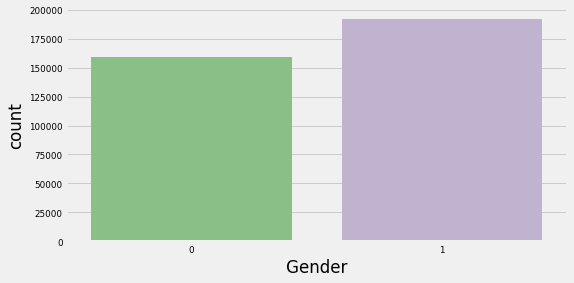

In [84]:
#Countplot for Gender feature 
plt.figure(figsize=(8,4))
sns.countplot(df['Gender'],palette='Accent')
plt.show()

0.0    187437
1.0     58288
Name: Is_Lead, dtype: int64


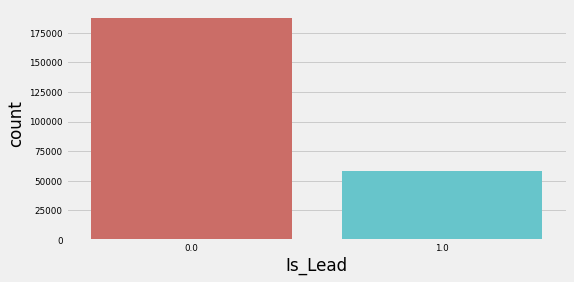

In [85]:
#Countplot for Target variable i.e 'Is_Lead'
target = 'Is_Lead'
plt.figure(figsize=(8,4))
sns.countplot(df[target],palette='hls')
print(df[target].value_counts())

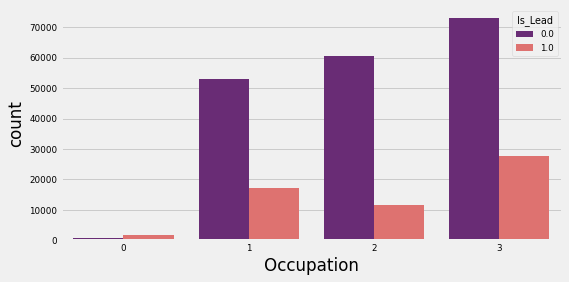

In [86]:
#Checking occupation with customers
plt.figure(figsize=(8,4))
sns.countplot(x='Occupation',hue='Is_Lead',data=df,palette= 'magma')
plt.show()

<Figure size 576x288 with 0 Axes>

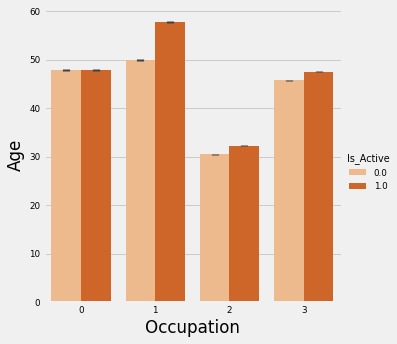

In [87]:
#Plot showing Activness of customer in last 3 months with respect to Occupation of customer
plt.figure(figsize=(8,4))
sns.catplot(y='Age',x='Occupation',hue='Is_Active',data=df,kind='bar',palette='Oranges')
plt.show()

In [88]:
# To balance the dataset , we will apply undersampling method
from sklearn.utils import resample
# separate the minority and majority classes
df_majority = df_1[df_1['Is_Lead']==0]
df_minority = df_1[df_1['Is_Lead']==1]

print(" The majority class values are", len(df_majority))
print(" The minority class values are", len(df_minority))
print(" The ratio of both classes are", len(df_majority)/len(df_minority))

 The majority class values are 187437
 The minority class values are 58288
 The ratio of both classes are 3.215704776283283


In [89]:
# undersample majority class
df_majority_undersampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=0)
# combine minority class with oversampled majority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

df_undersampled['Is_Lead'].value_counts()
df_1=df_undersampled

# display new class value counts
print(" The undersamples class values count is:", len(df_undersampled))
print(" The ratio of both classes are", len(df_undersampled[df_undersampled["Is_Lead"]==0])/len(df_undersampled[df_undersampled["Is_Lead"]==1]))

 The undersamples class values count is: 116576
 The ratio of both classes are 1.0


In [114]:
# dropping target variable 
#assign the value of y for training and testing phase
xc = df_1.drop(columns=['Is_Lead'])
yc = df_1[["Is_Lead"]]

In [115]:
df_1.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,1,62,32,1,2,20,0,1056750,1.0,1.0
15,1,33,18,3,1,69,0,517063,1.0,1.0
16,0,46,18,1,2,97,2,2282502,0.0,1.0
17,0,59,33,1,2,15,2,2384692,0.0,1.0
20,1,44,19,3,1,19,2,1001650,0.0,1.0


In [117]:
#Standardizing value of x by using standardscaler to make the data normally distributed
sc = StandardScaler()
df_xc = pd.DataFrame(sc.fit_transform(xc),columns=xc.columns)

In [109]:
df_xc

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0.871922,1.102987,1.080645,-1.254310,1.098078,-0.961192,-1.495172,-0.118958,1.192880
1,0.871922,-0.895316,-0.208525,1.008933,-0.052828,0.484610,-1.495172,-0.748273,1.192880
2,-1.146891,0.000475,-0.208525,-1.254310,1.098078,1.310784,1.220096,1.310361,-0.838307
3,-1.146891,0.896266,1.172729,-1.254310,1.098078,-1.108723,1.220096,1.429522,-0.838307
4,0.871922,-0.137339,-0.116441,1.008933,-0.052828,-0.990699,1.220096,-0.183209,-0.838307
...,...,...,...,...,...,...,...,...,...
116571,-1.146891,-1.239851,-1.497694,-0.122689,-1.203735,-0.636624,-0.137538,0.106962,1.192880
116572,0.871922,1.102987,-0.024357,-1.254310,-0.052828,1.163253,-1.495172,-0.519168,-0.838307
116573,0.871922,-1.308758,-0.853109,-0.122689,-1.203735,-0.931686,-0.137538,-0.255014,-0.838307
116574,-1.146891,-1.102037,0.159810,-0.122689,-1.203735,-0.990699,-0.137538,-0.956260,-0.838307


# Classification Modeling test 1

In [119]:
df_xc

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0.871922,1.102987,1.080645,-1.254310,1.098078,-0.961192,-1.495172,-0.118958,1.192880
1,0.871922,-0.895316,-0.208525,1.008933,-0.052828,0.484610,-1.495172,-0.748273,1.192880
2,-1.146891,0.000475,-0.208525,-1.254310,1.098078,1.310784,1.220096,1.310361,-0.838307
3,-1.146891,0.896266,1.172729,-1.254310,1.098078,-1.108723,1.220096,1.429522,-0.838307
4,0.871922,-0.137339,-0.116441,1.008933,-0.052828,-0.990699,1.220096,-0.183209,-0.838307
...,...,...,...,...,...,...,...,...,...
116571,-1.146891,-1.239851,-1.497694,-0.122689,-1.203735,-0.636624,-0.137538,0.106962,1.192880
116572,0.871922,1.102987,-0.024357,-1.254310,-0.052828,1.163253,-1.495172,-0.519168,-0.838307
116573,0.871922,-1.308758,-0.853109,-0.122689,-1.203735,-0.931686,-0.137538,-0.255014,-0.838307
116574,-1.146891,-1.102037,0.159810,-0.122689,-1.203735,-0.990699,-0.137538,-0.956260,-0.838307


In [125]:
yc.shape

(116576, 1)

In [141]:
def best_model(clf,xc,yc):  
    x_train,x_test,y_train,y_test=train_test_split(xc,yc,test_size=.20,random_state=44,stratify=yc)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    print("accuracy score:", accuracy_score(y_test,pred))
    print("Training Score:",clf.score(x_train,y_train))
    print("Testing Score:",clf.score(x_test,y_test))
    print("Cross Val Accuracy:",cross_val_score(clf,xc,yc,scoring="accuracy",cv=7).mean())
    print('Standard Division:',cross_val_score(clf,xc,yc,scoring="accuracy",cv=7).std())
    print("************************************************************************************")
    prob=clf.predict_proba(x_test)[:,1]
    print("Roc_Auc score:",roc_auc_score(y_test,prob))
    print("Precision score:",precision_score(y_test,pred))
    print("Recall Score:",recall_score(y_test,pred))
    print("F1 Score",f1_score(y_test,pred))
    print("**************************************************************************************")
    print("Confusion matrix")
    print(confusion_matrix(y_test,pred))
    cm=confusion_matrix(y_test,pred)
    print("Classification Report")
    print(classification_report(y_test,pred))
    Fpr,Tpr,thresholds=roc_curve(y_test,prob,pos_label=True)

    #plotting the graph for area under curve for representing accuracy of data
    plt.plot([0,1],[1,0],'g--')
    plt.plot(Fpr,Tpr)
    plt.xlabel('False_Positive_Rate')
    plt.ylabel('True_Positive_Rate')
    plt.title("Random Forest Classifier")
    plt.show()

accuracy score: 0.6613055412592211
Training Score: 0.6712738580313103
Testing Score: 0.6613055412592211
Cross Val Accuracy: 0.6695718068634083
Standard Division: 0.0034090266860668534
************************************************************************************
Roc_Auc score: 0.7246132492040775
Precision score: 0.6601106853980417
Recall Score: 0.6650368845428032
F1 Score 0.6625646284664359
**************************************************************************************
Confusion matrix
[[7666 3992]
 [3905 7753]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66     11658
         1.0       0.66      0.67      0.66     11658

    accuracy                           0.66     23316
   macro avg       0.66      0.66      0.66     23316
weighted avg       0.66      0.66      0.66     23316



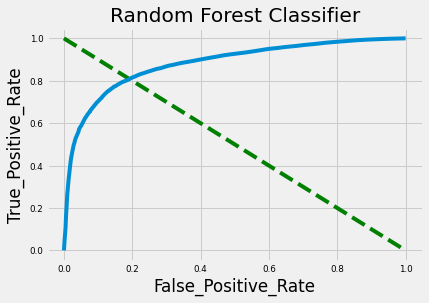

In [142]:
lr=LogisticRegression()
best_model(lr,df_xc,yc)

accuracy score: 0.8110739406416195
Training Score: 0.9999785545785975
Testing Score: 0.8110739406416195
Cross Val Accuracy: 0.812311318565205
Standard Division: 0.0031267128538865455
************************************************************************************
Roc_Auc score: 0.8787687580342383
Precision score: 0.8353833348746879
Recall Score: 0.7748327328872877
F1 Score 0.8039695607672112
**************************************************************************************
Confusion matrix
[[9878 1780]
 [2625 9033]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82     11658
         1.0       0.84      0.77      0.80     11658

    accuracy                           0.81     23316
   macro avg       0.81      0.81      0.81     23316
weighted avg       0.81      0.81      0.81     23316



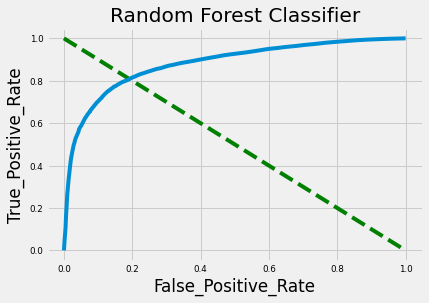

In [143]:
rf=RandomForestClassifier()
best_model(rf,df_xc,yc)

# Hyperparameter Tuning of Random Forest Model

In [151]:
rfh=RandomForestClassifier()
params={'n_estimators':[1,10,100]}
grid=GridSearchCV(rfh,params,scoring='roc_auc',cv=5)
        
grid.fit(df_xc,yc)

grid.best_params_

{'n_estimators': 100}

accuracy score: 0.812103276719849
Training Score: 0.9999356637357925
Testing Score: 0.812103276719849
Cross Val Accuracy: 0.8125000267207737
Standard Division: 0.0026226160756516845
************************************************************************************
Roc_Auc score: 0.8795890865594415
Precision score: 0.8371166496803484
Recall Score: 0.7750042889003259
F1 Score 0.8048639258830341
**************************************************************************************
Confusion matrix
[[9900 1758]
 [2623 9035]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82     11658
         1.0       0.84      0.78      0.80     11658

    accuracy                           0.81     23316
   macro avg       0.81      0.81      0.81     23316
weighted avg       0.81      0.81      0.81     23316



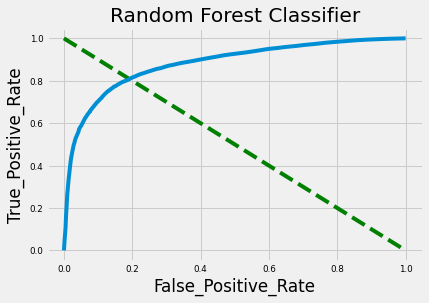

In [152]:
rfh=RandomForestClassifier(n_estimators=100)
best_model(rfh,df_xc,yc)

Wow, accuracy has been Improved

# Final Model

In [162]:
## Random Forest Classifier Result
xc_train,xc_test,yc_train,yc_test=train_test_split(df_xc, yc,random_state = 44,test_size=0.20,stratify=yc)
rfh.fit(xc_train,yc_train)
yc_pred=rfh.predict(xc_test)


Accuracy Accuracy: 0.81103105163836
Precison Score: 0.834625322997416
Recall Score: 0.7757762909589981
Roc_auc Score: 0.8801908018370298
F1 Score 0.8041255445896683
Classification Report 
               precision    recall  f1-score   support

         0.0       0.79      0.85      0.82     11658
         1.0       0.83      0.78      0.80     11658

    accuracy                           0.81     23316
   macro avg       0.81      0.81      0.81     23316
weighted avg       0.81      0.81      0.81     23316

Confusion MAtrix


<AxesSubplot:>

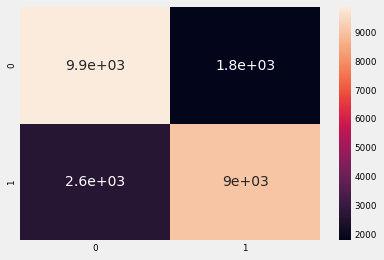

In [163]:
pred_pb=rfh.predict_proba(xc_test)[:,1]

pred_y=rfh.predict(xc_test)

print("Accuracy Accuracy:",accuracy_score(yc_test,pred_y))
print("Precison Score:",precision_score(yc_test,pred_y))
print("Recall Score:",recall_score(yc_test,pred_y))
print('Roc_auc Score:',roc_auc_score(yc_test,pred_pb))
fpr,tpr,thresholds=roc_curve(yc_test,pred_pb,pos_label=True)

print("F1 Score",f1_score(yc_test,pred_y))

print("Classification Report \n",classification_report(yc_test,pred_y))
print("Confusion MAtrix")
cm=confusion_matrix(yc_test,pred_y)
sns.heatmap(cm,annot=True)

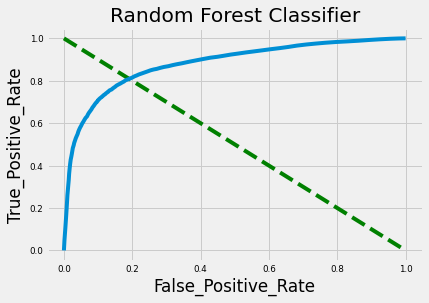

In [161]:
plt.plot([0,1],[1,0],'g--')
plt.plot(fpr,tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("Random Forest Classifier")
plt.show()

# Prediction

In [165]:
#we can drop column as they are irrelevant and have no effect on our data
df_3 = df_test

In [166]:
df_3.drop(columns=["source"],inplace=True)
df_3.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245725,VBENBARO,1,29,4,1,0,25,2,742366,0.0,NaN
245726,CCMEWNKY,1,43,18,1,1,49,0,925537,0.0,NaN
245727,VK3KGA9M,1,31,20,2,0,14,1,215949,0.0,NaN
245728,TT8RPZVC,1,29,22,1,0,33,1,868070,0.0,NaN
245729,SHQZEYTZ,0,29,20,1,0,19,1,657087,0.0,NaN


In [167]:
# dropping target variable 
#assign the value of y for training and testing phase
xc_pred = df_3.drop(columns=['Is_Lead',"ID"])

#Standardizing value of x by using standardscaler to make the data normally distributed
sc = StandardScaler()
df_xc_pred = pd.DataFrame(sc.fit_transform(xc_pred),columns=xc_pred.columns)

In [176]:
# lead_pred_xg=clf2.predict_proba(df_xc_pred)[:,1]
# lead_pred_lgb=lgb_model.predict_proba(df_xc_pred)[:,1]
lead_pred_rf=rfh.predict_proba(df_xc_pred)[:,1]
print(lead_pred_rf)

[0.11 0.94 0.1  ... 0.4  0.16 0.16]


In [177]:
final=pd.DataFrame()
final['ID']=df_3['ID']
final['Probablity']=lead_pred_rf

In [181]:
final.to_csv("Lead_result.csv",index=False)

In [182]:
result=pd.read_csv("Lead_result.csv")
result.head()

,ID,Probablity
0,VBENBARO,0.11
1,CCMEWNKY,0.94
2,VK3KGA9M,0.10
3,TT8RPZVC,0.05
4,SHQZEYTZ,0.08


# Saving the model :

In [185]:
import joblib
#save the model as a pickle in a file 
joblib.dump('Lead','lgb_model.pkl')


['lgb_model.pkl']